In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['invokana'].value_counts()

0    360537
1      4876
Name: invokana, dtype: int64

In [6]:
invokana = cinci_1320[(cinci_1320['invokana']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
invokana['invokana'].value_counts()

1    4876
Name: invokana, dtype: int64

In [8]:
invokana['Change_Type'].value_counts()

UNCHANGED    4876
Name: Change_Type, dtype: int64

In [9]:
invokana['invok_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(invokana['invokana'], invokana['Number_of_Payments_Included_in_Total_Amount'], invokana['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
invokana['invok_dollars'].sum()

415760.88

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'victoza', 'humira', 'levemir',
'entresto', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
invokana.drop(columns = drop_cols, inplace = True)

In [13]:
invokana['z_score'] = [ ((i - invokana['invok_dollars'].mean())/invokana['invok_dollars'].std()) for i in invokana['invok_dollars']]

In [14]:
invokana.shape

(4876, 13)

In [15]:
invokanab = invokana[(np.abs(invokana['z_score']) < 3)].copy()

In [16]:
invokanab.shape

(4709, 13)

In [17]:
invokana_wkly = invokanab.resample('w').sum()

In [18]:
invokana_wkly.head()

,invokana,invok_dollars,z_score
Date_of_Payment,,,
2013-08-04,1,6.67,-0.222966
2013-08-11,26,690.63,-4.329873
2013-08-18,11,603.25,-0.949444
2013-08-25,20,251.65,-4.123860
2013-09-01,19,268.23,-3.834938


In [19]:
invokana_wkly.sort_index()

,invokana,invok_dollars,z_score
Date_of_Payment,,,
2013-08-04,1,6.67,-0.222966
2013-08-11,26,690.63,-4.329873
2013-08-18,11,603.25,-0.949444
2013-08-25,20,251.65,-4.123860
2013-09-01,19,268.23,-3.834938
...,...,...,...
2020-02-16,3,141.78,-0.323456
2020-02-23,0,0.00,0.000000
2020-03-01,1,70.15,-0.042884


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

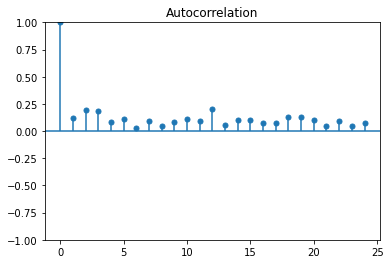

In [21]:
plot_acf(invokana_wkly['invok_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


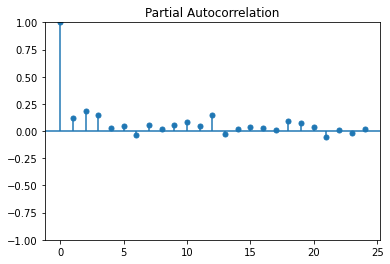

In [22]:
plot_pacf(invokana_wkly['invok_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
invokana_wkly['invok_dollars'] = [i+1 for i in invokana_wkly['invok_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = invokana_wkly.loc[:'2019-12-31']
train

,invokana,invok_dollars,z_score
Date_of_Payment,,,
2013-08-04,1,7.67,-0.222966
2013-08-11,26,691.63,-4.329873
2013-08-18,11,604.25,-0.949444
2013-08-25,20,252.65,-4.123860
2013-09-01,19,269.23,-3.834938
...,...,...,...
2019-12-01,6,641.37,0.365297
2019-12-08,5,293.04,-0.380969
2019-12-15,1,3.59,-0.234540


In [25]:
train['invok_dollars'].max()

3476.97

In [26]:
train.describe()

,invokana,invok_dollars,z_score
count,335.000000,335.000000,335.000000
mean,13.991045,323.511642,-2.469347
std,12.052651,446.475549,2.479914
min,0.000000,1.000000,-11.980514
25%,4.000000,56.995000,-3.823412
50%,11.000000,186.210000,-1.993504
75%,20.000000,385.990000,-0.654359
max,58.000000,3476.970000,3.344433


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(335, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2013-08-04 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invokana       335 non-null    int64  
 1   invok_dollars  335 non-null    float64
 2   z_score        335 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.5 KB


In [30]:
train.index

DatetimeIndex(['2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=335, freq='W-SUN')

In [31]:
test = invokana_wkly.loc['2020-01-01':]
test

,invokana,invok_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,5,64.42,-1.029525
2020-01-19,3,343.32,0.245442
2020-01-26,0,1.00,0.000000
2020-02-02,3,117.95,-0.393895
2020-02-09,4,151.26,-0.541288
2020-02-16,3,142.78,-0.323456
2020-02-23,0,1.00,0.000000
2020-03-01,1,71.15,-0.042884


In [32]:
test.describe()

,invokana,invok_dollars,z_score
count,11.000000,11.000000,11.000000
mean,2.000000,98.993636,-0.205784
std,1.732051,104.168266,0.353287
min,0.000000,1.000000,-1.029525
25%,0.500000,8.915000,-0.358676
50%,2.000000,71.150000,-0.042884
75%,3.000000,147.020000,0.000000
max,5.000000,343.320000,0.245442


In [33]:
test.shape

(11, 3)

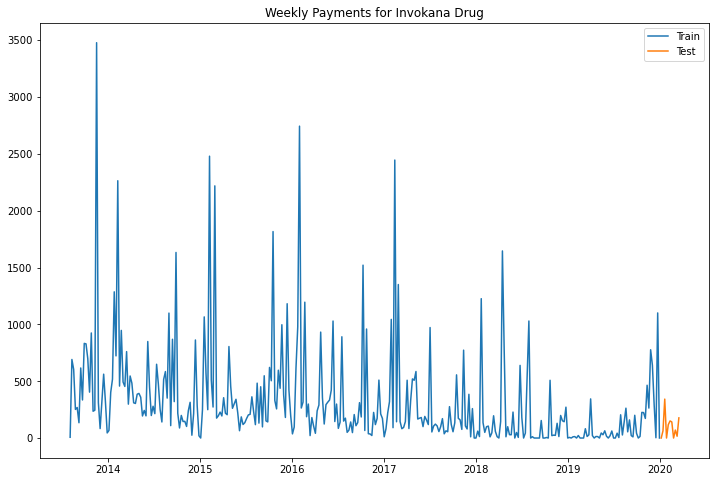

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Invokana Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,invokana,invok_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,5,64.42,-1.029525
2020-01-19,3,343.32,0.245442
2020-01-26,0,1.00,0.000000
2020-02-02,3,117.95,-0.393895
2020-02-09,4,151.26,-0.541288
2020-02-16,3,142.78,-0.323456
2020-02-23,0,1.00,0.000000
2020-03-01,1,71.15,-0.042884


In [36]:
df_preds['simple_mean'] = train['invok_dollars'].mean()
df_preds

,invokana,invok_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,0,1.00,0.000000,323.511642
2020-01-12,5,64.42,-1.029525,323.511642
2020-01-19,3,343.32,0.245442,323.511642
2020-01-26,0,1.00,0.000000,323.511642
2020-02-02,3,117.95,-0.393895,323.511642
2020-02-09,4,151.26,-0.541288,323.511642
2020-02-16,3,142.78,-0.323456,323.511642
2020-02-23,0,1.00,0.000000,323.511642
2020-03-01,1,71.15,-0.042884,323.511642


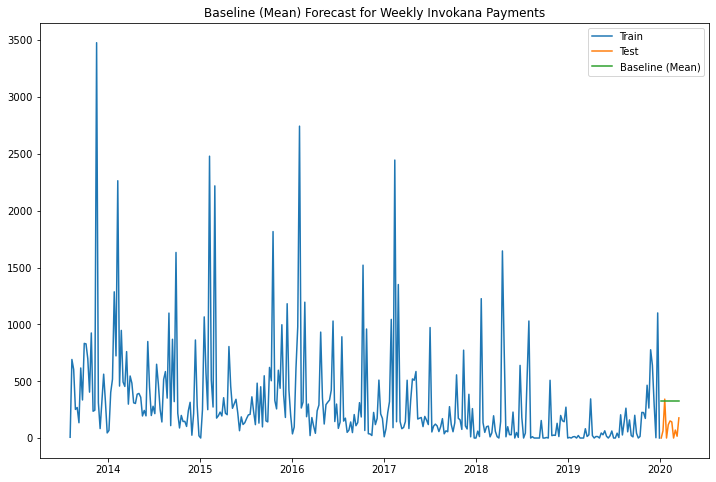

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Invokana Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 228.11952510176363
RMSE for Simple Mean Baseline Model: 245.50540801795043


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['invok_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33
2020-01-12,5,64.42,-1.029525,323.511642,777.16


In [44]:
df_preds['seasonal_7'].fillna(0, inplace=True)

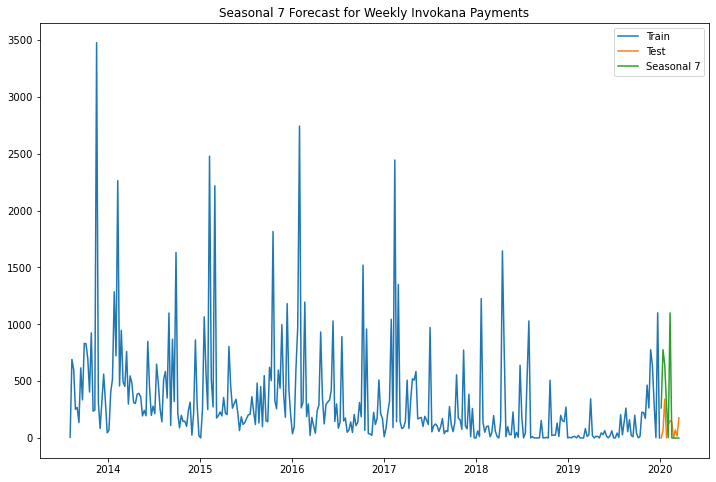

In [45]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Invokana Payments");

In [46]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 276.2945454545454
RMSE for Seasonal Baseline 7 Shift Model: 395.8600471240953


Seasonal Baseline Model with shift of 52

In [47]:
df_preds['seasonal_52'] = train['invok_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33,6.55
2020-01-12,5,64.42,-1.029525,323.511642,777.16,1.00


In [48]:
df_preds['seasonal_52'].fillna(0, inplace=True)

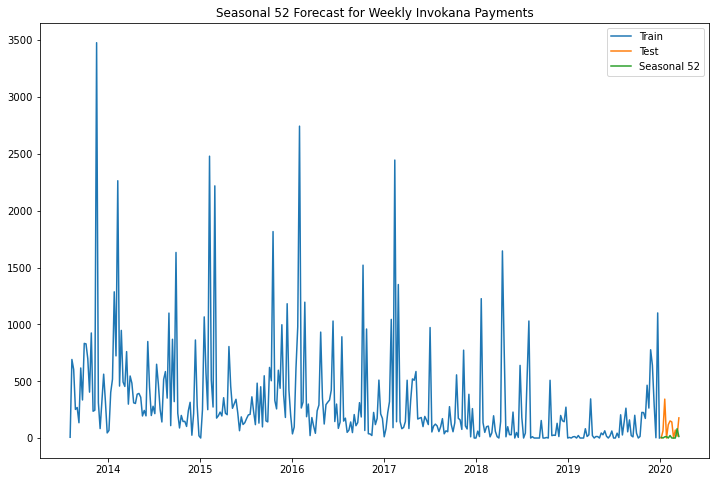

In [49]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Invokana Payments");

In [50]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 100.00727272727272
RMSE for Seasonal Baseline 52 Shift Model: 134.98081628007873


Simple Exponential Smoothing Model

In [51]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [52]:
ses = SimpleExpSmoothing(train['invok_dollars']).fit(smoothing_level=.5)

In [53]:
ses.summary()

Dep. Variable:,invok_dollars,No. Observations:,335
Model:,SimpleExpSmoothing,SSE,76410088.012
Optimized:,True,AIC,4137.061
Trend:,None,BIC,4144.689
Seasonal:,None,AICC,4137.182
Seasonal Periods:,None,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,21:54:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,287.79442,l.0,True


In [54]:
ses_forecast = ses.forecast(len(test))

In [55]:
df_preds['ses'] = ses_forecast

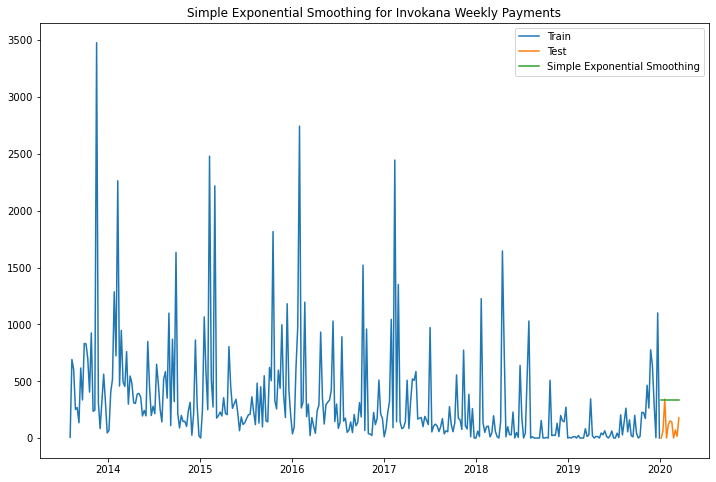

In [56]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Invokana Weekly Payments");

In [57]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 234.462404977127
RMSE for Simple Exponential Smoothing Model: 252.61455995420718


Holt-Winters Multiplicative Model with Seasonality of 52

In [58]:
hw_m52 = ExponentialSmoothing(
    train['invok_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [59]:
hw_m52.summary()

Dep. Variable:,invok_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,55508973.666
Optimized:,True,AIC,4138.005
Trend:,Multiplicative,BIC,4351.596
Seasonal:,Multiplicative,AICC,4162.802
Seasonal Periods:,52,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,21:55:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0161429,beta,True


In [60]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33,6.55,331.264051,133.255941
2020-01-12,5,64.42,-1.029525,323.511642,777.16,1.00,331.264051,462.515703


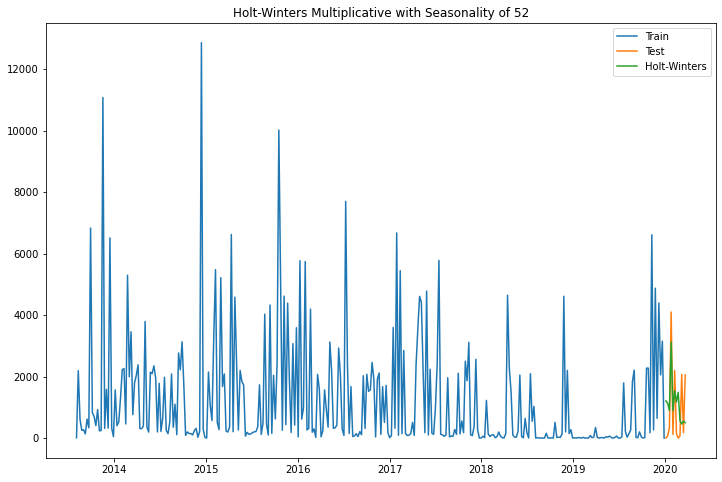

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [61]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 600.2581890994694
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 732.4045814752533


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [62]:
hw_a52 = ExponentialSmoothing(
    train['invok_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [63]:
hw_a52.summary()

Dep. Variable:,invok_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,53122599.809
Optimized:,True,AIC,4123.284
Trend:,Additive,BIC,4336.875
Seasonal:,Additive,AICC,4148.081
Seasonal Periods:,52,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,21:55:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0694983,alpha,True
smoothing_trend,0.0289442,beta,True


In [64]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33,6.55,331.264051,133.255941,96.345920
2020-01-12,5,64.42,-1.029525,323.511642,777.16,1.00,331.264051,462.515703,406.554206


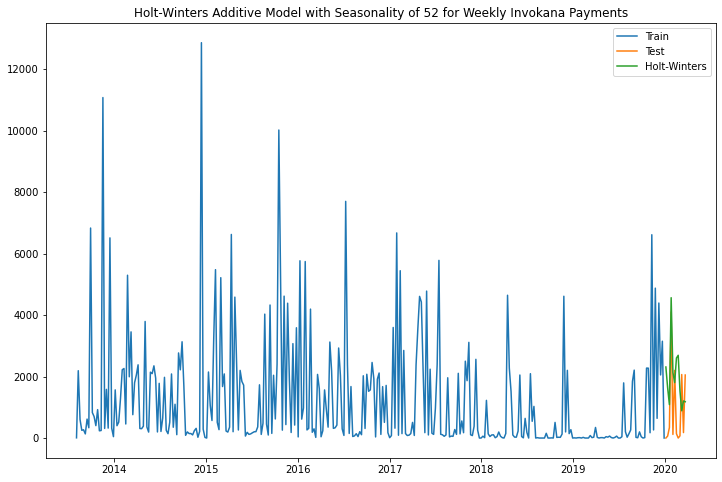

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Invokana Payments");

In [65]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 435.7112355870016
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 537.5741903399137


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [66]:
hw_a7 = ExponentialSmoothing(
    train['invok_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [67]:
hw_a7.summary()

Dep. Variable:,invok_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,69942766.010
Optimized:,True,AIC,4125.434
Trend:,Additive,BIC,4167.390
Seasonal:,Additive,AICC,4126.568
Seasonal Periods:,7,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,21:55:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1282756,alpha,True
smoothing_trend,0.0583906,beta,True


In [68]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33,6.55,331.264051,133.255941,96.345920,385.544086
2020-01-12,5,64.42,-1.029525,323.511642,777.16,1.00,331.264051,462.515703,406.554206,491.176328


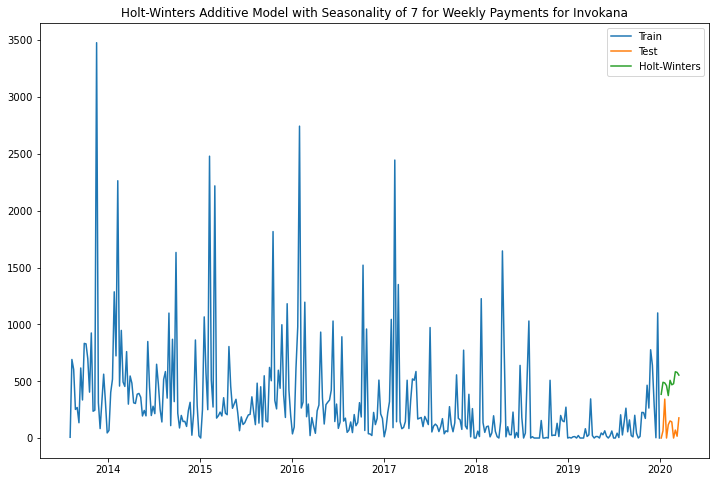

In [69]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Invokana");

In [70]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 389.19596198648145
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 405.53332463539545


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [71]:
hw_m7 = ExponentialSmoothing(
    train['invok_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
hw_m7.summary()

Dep. Variable:,invok_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,97844154.127
Optimized:,True,AIC,4237.893
Trend:,Multiplicative,BIC,4279.849
Seasonal:,Multiplicative,AICC,4239.027
Seasonal Periods:,7,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,21:55:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1817857,alpha,True
smoothing_trend,0.0605952,beta,True


In [73]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,invokana,invok_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,0,1.00,0.000000,323.511642,264.33,6.55,331.264051,133.255941,96.345920,385.544086,618.724776
2020-01-12,5,64.42,-1.029525,323.511642,777.16,1.00,331.264051,462.515703,406.554206,491.176328,933.548590


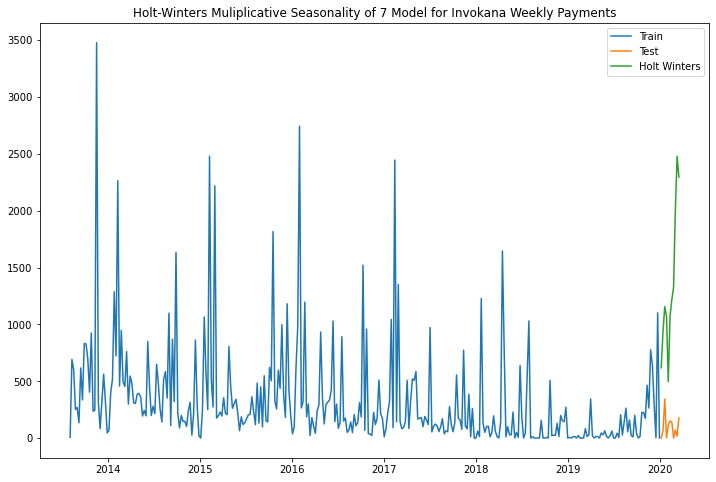

In [74]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['invok_dollars'], label='Train')
plt.plot(test.index, test['invok_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Invokana Weekly Payments");

In [75]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 1234.1917885207986
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 1385.1563785219334


Try a SARIMA Model

In [76]:
from pmdarima.utils import tsdisplay

In [77]:
traina = train['invok_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


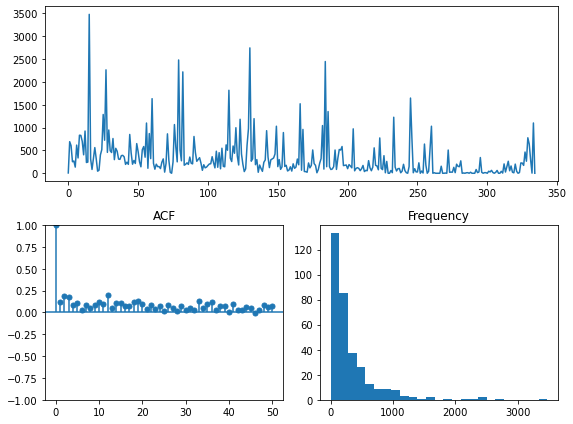

In [78]:
tsdisplay(traina)

In [79]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['invok_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5217.232, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5104.650, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5215.233, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5102.673, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=5104.649, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=5106.637, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=5062.078, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=5064.062, Time=0.06 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=5064.062, Time=0.06 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=5066.061, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=5055.173, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=5056.996, Time=0.10 sec
 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=5

In [80]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2496.766
Date:                Sun, 13 Mar 2022   AIC                           5003.533
Time:                        21:56:27   BIC                           5022.589
Sample:                             0   HQIC                          5011.131
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0094      0.068      0.139      0.890      -0.124       0.143
ar.L2          0.1042      0.042      2.459      0.014       0.021       0.187
ar.L3          0.0911      0.042      2.151      0.032       0.008       0.174
ma.L1         -0.9739      0.022    -43.916      0.000      -1.017      -0.930
sigma2      1.808e+05   7110.077     25.429      0.000    1.67e+05    1.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2962.26
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             3.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([254.43309397, 242.17827575, 168.2472873 , 189.36411306,
       180.74199557, 176.12507178, 177.10700716, 175.84950674,
       175.5192987 , 175.47460007, 175.3251873 ])

In [82]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    254.433094
2020-01-12    242.178276
Freq: W-SUN, Name: sarima7_auto, dtype: float64

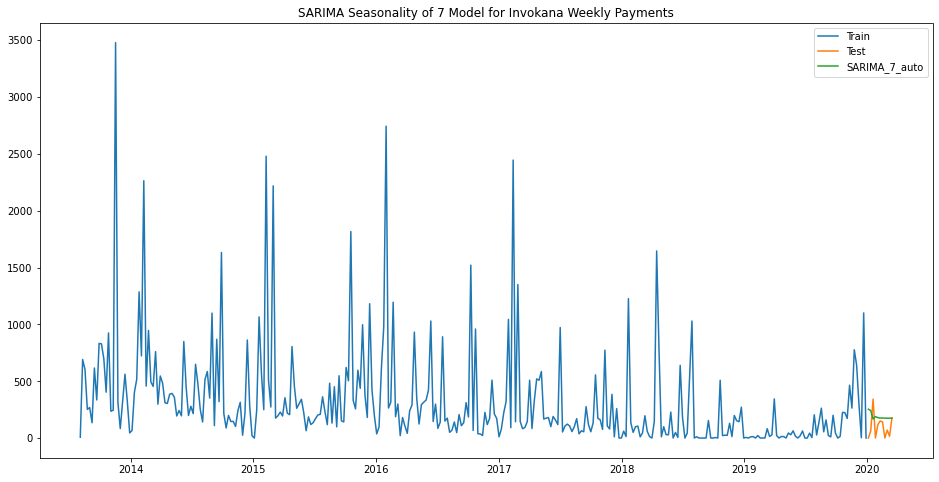

In [83]:
plt.figure(figsize=(16,8))
plt.plot(train['invok_dollars'], label='Train')
plt.plot(test['invok_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Invokana Weekly Payments");

In [84]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 123.39731710980814
RMSE for SARIMA with Seasonality of 7 Model: 145.95736334198108


Try a SARIMA Model with m = 52

In [85]:
model_s52 = pmd.auto_arima(train['invok_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=8.66 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5217.232, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=5104.339, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=5215.233, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=5102.673, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=5104.359, Time=0.75 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=5106.280, Time=1.60 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=5062.078, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=5062.712, Time=0.88 sec
 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=5062.951, Time=0.99 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=5063.491, Time=2.88 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=5055.173, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=5055.332, Time=0.91 sec
 ARIMA(3,1,0)(0,0,1)[52] inte

In [92]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  335
Model:             SARIMAX(3, 1, 1)x(2, 0, [], 52)   Log Likelihood               -2493.318
Date:                             Sun, 13 Mar 2022   AIC                           5000.636
Time:                                     22:10:27   BIC                           5027.314
Sample:                                          0   HQIC                          5011.273
                                             - 335                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0413      0.066     -0.625      0.532      -0.171       0.088
ar.L2          0.0965      0.046      2.111      0.035       0.007       0.186
ar.L3          0.1080      0.044      2.443      0.015       0.021       0.195
ma.L1         -0.9758      0.020    -49.630      0.000      -1.014      -0.937
ar.S.L52       0.1035      0.039      2.672      0.008       0.028       0.179
ar.S.L104      0.1334      0.064      2.091      0.037       0.008       0.258
sigma2      1.757e+05   7179.959     24.471      0.000    1.62e+05     1.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2848.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             3.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([207.05333421, 209.32100792, 275.16140647, 156.13569641,
       133.93071333, 135.30219009, 135.95686838, 121.48141043,
       125.72353809, 154.27482773, 128.64269135])

In [94]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    207.053334
2020-01-12    209.321008
Freq: W-SUN, Name: sarima52_auto, dtype: float64

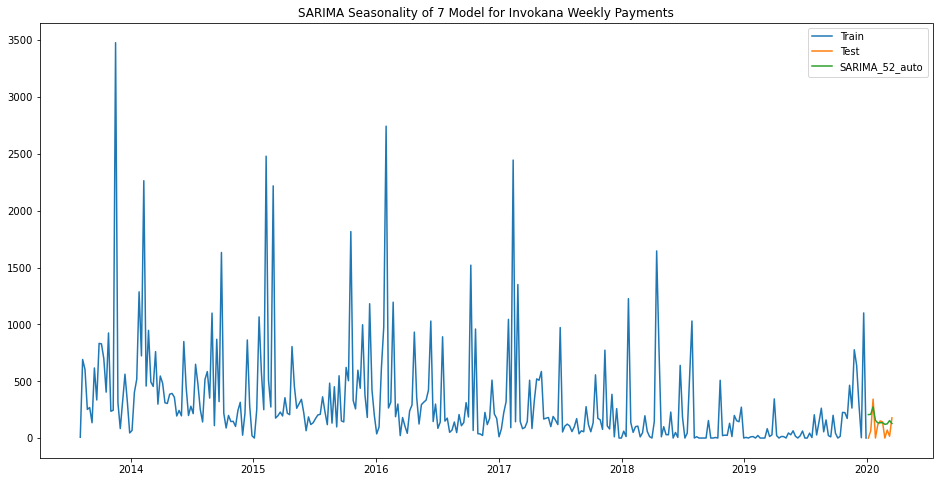

In [95]:
plt.figure(figsize=(16,8))
plt.plot(train['invok_dollars'], label='Train')
plt.plot(test['invok_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Invokana Weekly Payments");

In [96]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 88.64430653013508
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 109.36451907230499


In [97]:
print("Summary of Metrics for Weekly Invokana CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Invokana CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 228.11952510176363
RMSE for Simple Mean Baseline Model: 245.50540801795043
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 276.2945454545454
RMSE for Seasonal Baseline 7 Shift Model: 395.8600471240953
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 100.00727272727272
RMSE for Seasonal Baseline 52 Shift Model: 134.98081628007873
_________________________________________________
MAE for Simple Exponential Smoothing Model: 234.462404977127
RMSE for Simple Exponential Smoothing Model: 252.61455995420718
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 1234.1917885207986
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 1385.1563785219334
_________________________________________________
M

In [98]:
print("Continued Summary of Metrics for Weeky Invokana CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['invok_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['invok_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Invokana CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 389.19596198648145
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 405.53332463539545
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 435.7112355870016
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 537.5741903399137
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 123.39731710980814
RMSE for SARIMA with Seasonality of 7 Model: 145.95736334198108
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 88.64430653013508
RMSE for SARIMA with Seasonality of 52 Model: 109.36451907230499
_________________________________________________
